In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Information

## ISMN Dataset

In [2]:
data = pd.read_csv('../data/ismnData.csv')
data.timeStamp = pd.to_datetime(data['timeStamp']) 
data['year'] = data['timeStamp'].dt.year
startYear = 2010
data = data[data.year >= startYear]

In [3]:
data.tail(5)

,sm_5,sm_50,sm_20,sm_100,sm_10,p,st_5,st_50,st_20,st_100,st_10,at,station,sensor,sensorCode,network,timeStamp,year
25159486,0.178,0.184,0.248,0.398,0.178,0.0,20.8,21.9,20.6,23.2,21.9,23.3,YoumansFarm,Hydraprobe-Analog-(2.5-Volt),A,SCAN,2019-10-23 20:00:00+00:00,2019
25159487,0.176,0.201,0.247,0.401,0.176,0.0,20.9,21.9,20.8,23.2,22.1,23.1,YoumansFarm,Hydraprobe-Analog-(2.5-Volt),A,SCAN,2019-10-23 21:00:00+00:00,2019
25159488,0.181,0.167,0.245,0.401,0.170,0.0,20.9,21.9,20.9,23.2,22.1,23.4,YoumansFarm,Hydraprobe-Analog-(2.5-Volt),A,SCAN,2019-10-23 22:00:00+00:00,2019
25159489,0.176,0.181,0.243,0.404,0.176,0.0,20.6,21.9,21.0,23.2,21.9,16.8,YoumansFarm,Hydraprobe-Analog-(2.5-Volt),A,SCAN,2019-10-23 23:00:00+00:00,2019
25159490,0.175,0.183,0.244,0.404,0.170,0.0,20.2,21.9,21.0,23.2,21.5,13.9,YoumansFarm,Hydraprobe-Analog-(2.5-Volt),A,SCAN,2019-10-24 00:00:00+00:00,2019


## stations

### list 

In [4]:
data.station.unique()

array(['AAMU-jtg', 'Abrams', 'AdamsRanch#1', 'Alcalde', 'AlkaliMesa',
       'AllenFarms', 'Ames', 'BeasleyLake', 'Beaumont', 'BlueCreek',
       'BodieHills', 'BosqueSeco', 'BraggFarm', 'BroadAcres', 'BusbyFarm',
       'Bushland#1', 'CMRBLTAR-MO', 'CacheJunction', 'CarverFarm',
       'CaveValley', 'CentraliaLake', 'Charkiln', 'ChickenRidge',
       'Circleville', 'CochoraRanch', 'Combate', 'ConradAgRc',
       'CookFarmFieldD', 'Corozal', 'Cper', 'CrescentLake#1',
       'Crossroads', 'Cullman-NAHRC', 'DeathValleyJCT', 'DeeRiverRanch',
       'DeepSprings', 'DesertCenter', 'Dexter', 'DoeRidge', 'Dugway',
       'EagleLake', 'Eastland', 'EastviewFarm', 'ElsberryPMC',
       'Enterprise', 'Ephraim', 'ErosDataCenter', 'Essex', 'FordDryLake',
       'FortAssiniboine#1', 'FortReno#1', 'Fortuna', 'FrenchGulch',
       'Geneva#1', 'GlacialRidge', 'GoodwinCreekPasture',
       'GoodwinCreekTimber', 'Goshute', 'Grantsville', 'GreenRiver',
       'GrouseCreek', 'GuilarteForest', 'HalsCanyon',

### size

In [5]:
print('the number of stations:', len(data.station.unique()))

the number of stations: 195


# Missing values

## years

yearCheck = data.drop(['station','sensor','sensorCode','network','year','timeStamp'],1).isna().groupby([data.year], sort=False).sum()

yearCheck

In [3]:
missingInfo = data.drop(['station','sensor','sensorCode','network','timeStamp','year'],1).isna().groupby([data.station, data.sensor], sort=False).sum()

In [5]:
data = data.reset_index(drop = True)

In [6]:
size = len(data[data.station == data.station[0]])
print(size)

85993


In [7]:
mvRate = round(missingInfo / (float(size)), 3)
#mvRate.to_csv('./details/missingValueInfo.csv')

In [8]:
threshold_missingValue = 0.5

In [9]:
dic = mvRate[mvRate < threshold_missingValue].isnull().any(axis = 1)
candidates = list(dic[dic == False].index)
print ('the number of candidates:', len(candidates))
print (candidates)

the number of candidates: 145
[('AAMU-jtg', 'Hydraprobe-Analog-(2.5-Volt)'), ('Abrams', 'Hydraprobe-Analog-(2.5-Volt)'), ('AdamsRanch#1', 'Hydraprobe-Analog-(2.5-Volt)'), ('Alcalde', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)'), ('AlkaliMesa', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)'), ('AllenFarms', 'Hydraprobe-Analog-(2.5-Volt)'), ('Ames', 'Hydraprobe-Analog-(2.5-Volt)'), ('BeasleyLake', 'Hydraprobe-Analog-(2.5-Volt)'), ('BlueCreek', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)'), ('BraggFarm', 'Hydraprobe-Analog-(2.5-Volt)'), ('Bushland#1', 'Hydraprobe-Analog-(2.5-Volt)'), ('CMRBLTAR-MO', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)'), ('CacheJunction', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)'), ('CaveValley', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)'), ('CentraliaLake', 'Hydraprobe-Analog-(2.5-Volt)'), ('Charkiln', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)'), ('ChickenRidge', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)-A'), ('ChickenRidge', 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)-B'), ('Circleville', 'Hydraprobe-Digita

In [14]:
candiData = pd.DataFrame(candidates, columns = ['station','sensor'])
candiData.head(5)

,station,sensor
0,AAMU-jtg,Hydraprobe-Analog-(2.5-Volt)
1,Abrams,Hydraprobe-Analog-(2.5-Volt)
2,AdamsRanch#1,Hydraprobe-Analog-(2.5-Volt)
3,Alcalde,Hydraprobe-Digital-Sdi-12-(2.5-Volt)
4,AlkaliMesa,Hydraprobe-Digital-Sdi-12-(2.5-Volt)


In [11]:
duplicatedSensor = candiData[candiData.station.isin(candiData[candiData.loc[:,['station']].duplicated() == True].station)]
duplicatedSensor

,station,sensor
16,ChickenRidge,Hydraprobe-Digital-Sdi-12-(2.5-Volt)-A
17,ChickenRidge,Hydraprobe-Digital-Sdi-12-(2.5-Volt)-B
50,HubbardBrook,Hydraprobe-Analog-(2.5-Volt)-A
51,HubbardBrook,Hydraprobe-Analog-(2.5-Volt)-B
53,JornadaExpRange,Hydraprobe-Digital-Sdi-12-(2.5-Volt)-A
54,JornadaExpRange,Hydraprobe-Digital-Sdi-12-(2.5-Volt)-B
57,KyleCanyon,Hydraprobe-Analog-(2.5-Volt)-A
58,KyleCanyon,Hydraprobe-Analog-(2.5-Volt)-B
64,LyeBrook,Hydraprobe-Analog-(2.5-Volt)-A
65,LyeBrook,Hydraprobe-Analog-(2.5-Volt)-B


In [13]:
duplicatedSensor.merge(mvRate, on = ['station','sensor'], how = 'left')

,station,sensor,sm_5,sm_50,sm_20,sm_100,sm_10,p,st_5,st_50,st_20,st_100,st_10,at
0,ChickenRidge,Hydraprobe-Digital-Sdi-12-(2.5-Volt)-A,0.007,0.007,0.007,0.008,0.007,0.006,0.007,0.007,0.007,0.008,0.007,0.184
1,ChickenRidge,Hydraprobe-Digital-Sdi-12-(2.5-Volt)-B,0.019,0.007,0.008,0.007,0.008,0.006,0.008,0.007,0.008,0.007,0.008,0.184
2,HubbardBrook,Hydraprobe-Analog-(2.5-Volt)-A,0.065,0.069,0.133,0.072,0.269,0.052,0.069,0.069,0.069,0.069,0.069,0.060
3,HubbardBrook,Hydraprobe-Analog-(2.5-Volt)-B,0.146,0.147,0.147,0.147,0.147,0.052,0.145,0.145,0.145,0.145,0.145,0.060
4,JornadaExpRange,Hydraprobe-Digital-Sdi-12-(2.5-Volt)-A,0.015,0.124,0.013,0.013,0.123,0.013,0.096,0.140,0.013,0.013,0.013,0.013
5,JornadaExpRange,Hydraprobe-Digital-Sdi-12-(2.5-Volt)-B,0.014,0.293,0.112,0.123,0.014,0.013,0.014,0.308,0.123,0.097,0.013,0.013
6,KyleCanyon,Hydraprobe-Analog-(2.5-Volt)-A,0.363,0.355,0.355,0.355,0.355,0.055,0.355,0.355,0.355,0.355,0.355,0.056
7,KyleCanyon,Hydraprobe-Analog-(2.5-Volt)-B,0.356,0.355,0.355,0.355,0.419,0.055,0.355,0.355,0.355,0.355,0.355,0.056
8,LyeBrook,Hydraprobe-Analog-(2.5-Volt)-A,0.450,0.438,0.487,0.493,0.411,0.119,0.441,0.439,0.439,0.440,0.441,0.213
9,LyeBrook,Hydraprobe-Analog-(2.5-Volt)-B,0.439,0.439,0.443,0.442,0.442,0.119,0.439,0.442,0.443,0.442,0.442,0.213


In [16]:
preparedISMNData = candiData.merge(data, on = ['station','sensor'], how = 'left')

In [ ]:
preparedISMNData.drop(['station','sensor','sensorCode','network','timeStamp','year'],1).isna().groupby([preparedISMNData.station, preparedISMNData.sensor], sort=False).sum()

# soil types distribution

dealing in the soilData table
- If the soil type has less than threshold stations, then remove
- get candidate of soil type

In [72]:
soilData = pd.read_csv('../data/soilData.csv')
soilData.head()

,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,...,TAXNWRB_Class1,TAXNWRB_Class2,TAXNWRB_Class3,TAXOUSDA_Class1,TAXOUSDA_Class2,TAXOUSDA_Class3,lat,long,network,station
0,1242,1238,1396,1454,1518,1540,1540,20,17,16,...,Haplic Acrisols,Haplic Luvisols,Haplic Alisols,Udults,Udalfs,Udepts,34.783,-86.550,SCAN,AAMU-jtg
1,1435,1452,1516,1635,1659,1672,1679,13,12,10,...,Haplic Kastanozems,Luvic Phaeozems,Haplic Luvisols,Ustolls,Ustalfs,Aquolls,37.133,-97.083,SCAN,Abrams
2,1485,1467,1482,1508,1574,1583,1584,13,16,18,...,Haplic Luvisols,Haplic Kastanozems,Haplic Calcisols,Ustolls,Ustalfs,Calcids,34.250,-105.417,SCAN,AdamsRanch#1
3,1485,1472,1495,1552,1543,1542,1556,11,14,15,...,Haplic Cambisols,Luvic Calcisols,Haplic Calcisols,Calcids,Orthents,Argids,36.083,-106.050,SCAN,Alcalde
4,1497,1454,1489,1525,1586,1591,1603,12,16,16,...,Haplic Luvisols,Luvic Calcisols,Haplic Calcisols,Ustalfs,Ustepts,Psamments,37.667,-109.367,SCAN,AlkaliMesa


Get stations which only includes in station candidates

In [76]:
soilData = soilData[soilData.station.isin(candidates.station)]
soilData.head(3)

,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,...,TAXNWRB_Class1,TAXNWRB_Class2,TAXNWRB_Class3,TAXOUSDA_Class1,TAXOUSDA_Class2,TAXOUSDA_Class3,lat,long,network,station
0,1242,1238,1396,1454,1518,1540,1540,20,17,16,...,Haplic Acrisols,Haplic Luvisols,Haplic Alisols,Udults,Udalfs,Udepts,34.783,-86.550,SCAN,AAMU-jtg
1,1435,1452,1516,1635,1659,1672,1679,13,12,10,...,Haplic Kastanozems,Luvic Phaeozems,Haplic Luvisols,Ustolls,Ustalfs,Aquolls,37.133,-97.083,SCAN,Abrams
2,1485,1467,1482,1508,1574,1583,1584,13,16,18,...,Haplic Luvisols,Haplic Kastanozems,Haplic Calcisols,Ustolls,Ustalfs,Calcids,34.250,-105.417,SCAN,AdamsRanch#1


## TAXNWRB_Class1

In [97]:
soilClassVar = 'TAXNWRB_Class1'
threshold_stations = 0

In [98]:
soilTypeFreq = soilData.loc[:,[soilClassVar,'station']].groupby(soilClassVar).count().sort_values(['station'],ascending=False)
soilTypeFreq = soilTypeFreq.loc[soilTypeFreq.station > threshold_stations,].reset_index()
print (sum(soilTypeFreq.station))
soilTypeFreq

138


,TAXNWRB_Class1,station
0,Haplic Luvisols,38
1,Haplic Kastanozems,28
2,Haplic Acrisols,21
3,Haplic Calcisols,14
4,Luvic Phaeozems,5
5,Haplic Chernozems,5
6,Haplic Podzols,4
7,Luvic Calcisols,3
8,Haplic Alisols,3
9,Haplic Phaeozems,2


In [79]:
lisSoilClassVar = list(soilTypeFreq[soilClassVar])
lisSoilClassVar

['Haplic Luvisols',
 'Haplic Kastanozems',
 'Haplic Acrisols',
 'Haplic Calcisols']

In [84]:
selStation_TAXNWRB = soilData[soilData[soilClassVar].isin(lisSoilClassVar)].station.unique()
selStation_TAXNWRB

array(['AAMU-jtg', 'Abrams', 'AdamsRanch#1', 'AlkaliMesa', 'AllenFarms',
       'BeasleyLake', 'BlueCreek', 'BraggFarm', 'Bushland#1',
       'CacheJunction', 'CaveValley', 'Charkiln', 'Circleville',
       'CookFarmFieldD', 'Cper', 'Cullman-NAHRC', 'DeeRiverRanch',
       'DeepSprings', 'Dexter', 'DoeRidge', 'EagleLake', 'Eastland',
       'EastviewFarm', 'Enterprise', 'Ephraim', 'ErosDataCenter',
       'FortReno#1', 'Fortuna', 'Geneva#1', 'GoodwinCreekPasture',
       'GoodwinCreekTimber', 'GreenRiver', 'GrouseCreek', 'HalsCanyon',
       'HarmsWay', 'Holden', 'IsbellFarms', 'JornadaExpRange', 'KnoxCity',
       'KyleCanyon', 'Lind#1', 'LittleRedFox', 'LittleRiver',
       'LynhartRanch', 'MahantangoCk', 'MammothCave', 'Manderfield',
       'MarbleCreek', 'MaricaoForest', 'Mayday', 'McalisterFarm',
       'MccrackenMesa', 'Milford', 'Morgan', 'MorrisFarms',
       'MountainHome', 'NPiedmontArec', 'Nephi', 'Nunn#1', 'Panguitch',
       'ParkValley', 'PeeDee', 'PerdidoRivFarms', 'Pert

Find the missing value from final Data
- If the station with high missing value, then remove
- get candidate of stations

In [81]:
data.columns

Index(['sm_5', 'sm_50', 'sm_20', 'sm_100', 'sm_10', 'p', 'st_5', 'st_50',
       'st_20', 'st_100', 'st_10', 'at', 'station', 'sensor', 'sensorCode',
       'network', 'timeStamp', 'year'],
      dtype='object')

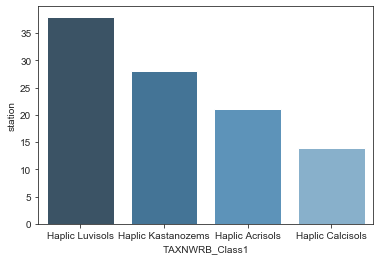

In [89]:
sns.set_style("ticks")
ax = sns.barplot(x=soilClassVar, y="station", data=soilTypeFreq,palette=("Blues_d"))

## TAXOUSDA_Class1

In [95]:
soilClassVar = 'TAXOUSDA_Class1'
threshold_stations = 1

In [96]:
soilTypeFreq = soilData.loc[:,[soilClassVar,'station']].groupby(soilClassVar).count().sort_values(['station'],ascending=False)
soilTypeFreq = soilTypeFreq.loc[soilTypeFreq.station > threshold_stations,].reset_index()
print (sum(soilTypeFreq.station))
soilTypeFreq

132


,TAXOUSDA_Class1,station
0,Udults,25
1,Ustolls,18
2,Udalfs,17
3,Xerolls,14
4,Aqualfs,12
5,Udolls,10
6,Calcids,7
7,Argids,6
8,Psamments,5
9,Orthents,4


In [92]:
lisSoilClassVar = list(soilTypeFreq[soilClassVar])
lisSoilClassVar

['Udults',
 'Ustolls',
 'Udalfs',
 'Xerolls',
 'Aqualfs',
 'Udolls',
 'Calcids',
 'Argids']

In [93]:
selStation_TAXOUSDA = soilData[soilData[soilClassVar].isin(lisSoilClassVar)].station.unique()

In [94]:
data.columns

Index(['sm_5', 'sm_50', 'sm_20', 'sm_100', 'sm_10', 'p', 'st_5', 'st_50',
       'st_20', 'st_100', 'st_10', 'at', 'station', 'sensor', 'sensorCode',
       'network', 'timeStamp', 'year'],
      dtype='object')

In [46]:
data[data['station'].isin(list(selStation))].loc[:,['sm_5','sm_10','sm_20','sm_50','sm_100','p',soilClassVar]].groupby(soilClassVar).std()

,sm_5,sm_10,sm_20,sm_50,sm_100,p
TAXOUSDA_Class1,,,,,,
Aqualfs,0.125757,26.736907,0.103279,0.103692,0.147186,0.488579
Calcids,0.070325,0.076115,0.083751,0.085739,0.090543,0.547654
Udalfs,0.102402,0.095158,0.105793,0.101140,0.122809,0.438248
Udolls,0.134889,0.138026,0.141926,0.162906,0.160429,58.363907
Udults,0.124275,0.103779,0.116752,0.111832,0.101772,0.455732
Ustolls,0.095422,0.084483,0.097311,0.109181,0.118909,0.421512
Xerolls,0.107374,0.105969,0.113451,0.999091,0.115518,31.214314


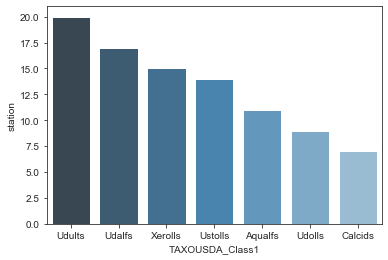

In [47]:
sns.set_style("ticks")
ax = sns.barplot(x=soilClassVar, y="station", data=soilTypeFreq,palette=("Blues_d"))

## combine TAXNWRB and TAXOUSDA

In [65]:
selStation = list(set(selStation_TAXNWRB).union(set(selStation_TAXOUSDA)))

In [73]:
data[data['station'].isin(list(selStation))].loc[:,['sm_5','sm_10','sm_20','sm_50','sm_100','p','TAXOUSDA_Class1','TAXNWRB_Class1']].groupby(['TAXOUSDA_Class1','TAXNWRB_Class1']).std()

sm_5      sm_10     sm_20  \
TAXOUSDA_Class1 TAXNWRB_Class1                                               
Aqualfs         Gleyic Luvisols              0.127560   0.096037  0.087313   
                Haplic Fluvisols             0.071779   0.039149  0.023084   
                Haplic Luvisols              0.129209  29.659562  0.106745   
Calcids         Haplic Calcisols             0.071542   0.084149  0.093252   
                Haplic Cambisols             0.060118   0.042242  0.051634   
                Haplic Fluvisols (Calcaric)  0.062391   0.061437  0.059441   
                Haplic Kastanozems           0.050040   0.055877  0.047220   
Udalfs          Gleyic Luvisols              0.101785   0.081231  0.058639   
                Haplic Acrisols              0.073987   0.073708  0.050187   
                Haplic Cambisols (Eutric)    0.046182   0.038630  0.035770   
                Haplic Luvisols              0.104159   0.096293  0.113073   
Udolls          Haplic Chernozems            0.063940   0.066433  0.064988   
                Haplic Phaeozems             0.107624   0.096325  0.078036   
                Luvic Phaeozems              0.104272   0.096626  0.086505   
Udults          Haplic Acrisols              0.120965   0.094933  0.109681   
                Haplic Alisols               0.102880   0.076284  0.067692   
                Haplic Luvisols              0.101445   0.077487  0.046395   
Ustolls         Haplic Calcisols             0.077851   0.066189  0.068694   
                Haplic Kastanozems           0.091771   0.082929  0.091537   
                Haplic Luvisols              0.081486   0.075148  0.093473   
Xerolls         Haplic Calcisols             0.085676   0.083076  0.070315   
                Haplic Kastanozems           0.112793   0.105433  0.119468   
                Haplic Luvisols              0.067803   0.048727  0.065955   

                                                sm_50    sm_100           p  
TAXOUSDA_Class1 TAXNWRB_Class1                                               
Aqualfs         Gleyic Luvisols              0.152060  0.020857    0.333761  
                Haplic Fluvisols             0.005034  0.020296    0.440711  
                Haplic Luvisols              0.101691  0.161874    0.508028  
Calcids         Haplic Calcisols             0.095860  0.101885    0.718283  
                Haplic Cambisols             0.018844  0.035553    0.123983  
                Haplic Fluvisols (Calcaric)  0.041169  0.019068    0.110783  
                Haplic Kastanozems           0.049590  0.021171    0.193324  
Udalfs          Gleyic Luvisols              0.086301  0.152470    0.391758  
                Haplic Acrisols              0.058864  0.066376    0.393452  
                Haplic Cambisols (Eutric)    0.012549  0.097304    0.262833  
                Haplic Luvisols              0.103864  0.115230    0.459245  
Udolls          Haplic Chernozems            0.063907  0.096193   99.611314  
                Haplic Phaeozems             0.094415  0.079103    0.349437  
                Luvic Phaeozems              0.075597  0.081307    1.137874  
Udults          Haplic Acrisols              0.111252  0.095217    0.478142  
                Haplic Alisols               0.083809  0.077603    0.416618  
                Haplic Luvisols              0.070039  0.079716    0.408498  
Ustolls         Haplic Calcisols             0.049798  0.058427    0.127910  
                Haplic Kastanozems           0.104818  0.124048    0.439206  
                Haplic Luvisols              0.105759  0.108966    0.426825  
Xerolls         Haplic Calcisols             0.042217  0.048935    0.156501  
                Haplic Kastanozems           1.122874  0.123252    0.866128  
                Haplic Luvisols              0.061059  0.067520  114.943977

In [76]:
data[data['station'].isin(list(selStation))].loc[:,['station','TAXOUSDA_Class1','TAXNWRB_Class1']].drop_duplicates().groupby(['TAXOUSDA_Class1','TAXNWRB_Class1']).count()

station
TAXOUSDA_Class1 TAXNWRB_Class1                      
Aqualfs         Gleyic Luvisols                    1
                Haplic Fluvisols                   1
                Haplic Luvisols                    9
Calcids         Haplic Calcisols                   4
                Haplic Cambisols                   1
                Haplic Fluvisols (Calcaric)        1
                Haplic Kastanozems                 1
Udalfs          Gleyic Luvisols                    2
                Haplic Acrisols                    1
                Haplic Cambisols (Eutric)          1
                Haplic Luvisols                   13
Udolls          Haplic Chernozems                  3
                Haplic Phaeozems                   2
                Luvic Phaeozems                    4
Udults          Haplic Acrisols                   13
                Haplic Alisols                     1
                Haplic Luvisols                    6
Ustolls         Haplic Calcisols                   1
                Haplic Kastanozems                10
                Haplic Luvisols                    3
Xerolls         Haplic Calcisols                   2
                Haplic Kastanozems                12
                Haplic Luvisols                    1